# Brief : Et si la poste se mettait à l'ia


Description du dataset :Les fichiers de données train.csv et test.csv contiennent des images en niveaux de gris de chiffres dessinés à la main, de zéro à neuf.  

Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, pour un total de 784 pixels au total. Chaque pixel est associé à une seule valeur de pixel, indiquant la luminosité ou l'obscurité de ce pixel, les nombres les plus élevés signifiant plus sombre. Cette valeur de pixel est un entier compris entre 0 et 255 inclus.  

L'ensemble de données d'apprentissage (train.csv) comporte 785 colonnes. La première colonne, appelée "label", est le chiffre qui a été dessiné par l'utilisateur. Le reste des colonnes contient les valeurs de pixel de l'image associée.  

 
Shape :42000,785  

Target :label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

LECTURE DU CSV ET AFFICHAGE DES PREMIERS CHIFFRES 

In [3]:
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


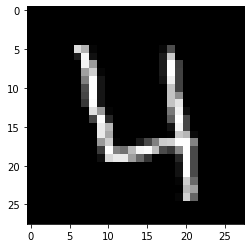

In [15]:
img1=df.iloc[3,1:]
img1=img1.to_numpy()
img2d= np.reshape(img1,(28,28))
plt.imshow(img2d, interpolation='nearest', cmap='gray')

In [3]:
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.label.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

VISUALISATION DES DONNEES 

<AxesSubplot:xlabel='label', ylabel='Count'>

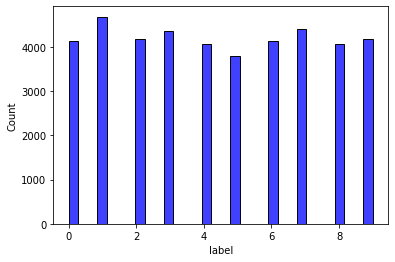

In [6]:
plt.figure()
sns.histplot(df.label,color="blue")

MATRICE DE CORRELATION 

In [8]:
correl=df.corr()


<AxesSubplot:>

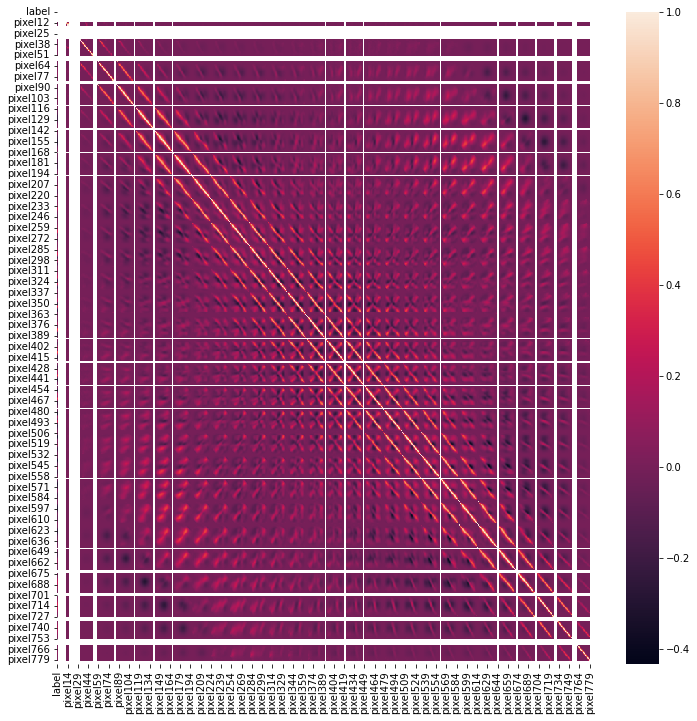

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(correl)

La matrice de corrélation n'est pas normale, nous ne pouvons trouver aucune corrélation, ce qui n'est pas surprenant vu le contenu du jeu de données 

In [4]:
X = df.loc[:,df.columns != 'label']
y= df.label


STANDARDISATON DES DONNEES

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X=scaler.fit_transform(X)


SPLIT DES DONNEES POUR L'ENTRAINEMENT (25%)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.25,stratify=y)

MATRICE DE CONFUSION POUR EVALUER NOS TROIS MODELES (RBF, LINEAR ET POLY)

In [10]:

from sklearn.metrics import confusion_matrix,classification_report

clf_rbf= SVC()
clf_linear= SVC(kernel="linear")
clf_poly= SVC(kernel="poly")

my_svc=[clf_linear,clf_poly,clf_rbf]
matrices_confusion=[]
class_reports=[]

for each in my_svc:
    each.fit(X_train,y_train)
    y_pred=each.predict(X_test)
    print(classification_report(y_test,y_pred))
    matrices_confusion.append(confusion_matrix(y_test,y_pred))
    class_reports.append(classification_report(y_test,y_pred))




Les trois modèles apportent de bons résultats mais nous pouvons voir que le modèle par défaut (RBF) offre un résultat légèrement supérieur aux autres.
Nous allons donc poursuivre avec ce modèle afin de l'améliorer pour optimiser le résultat.

VISUALIATION MATRICE DE CONFUSION

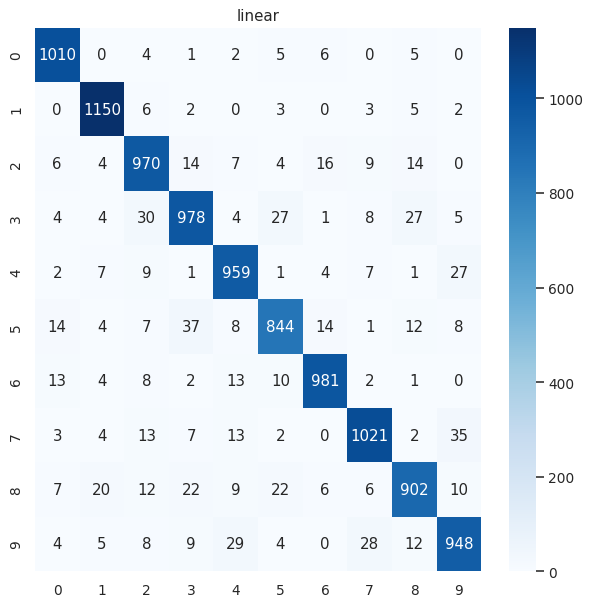

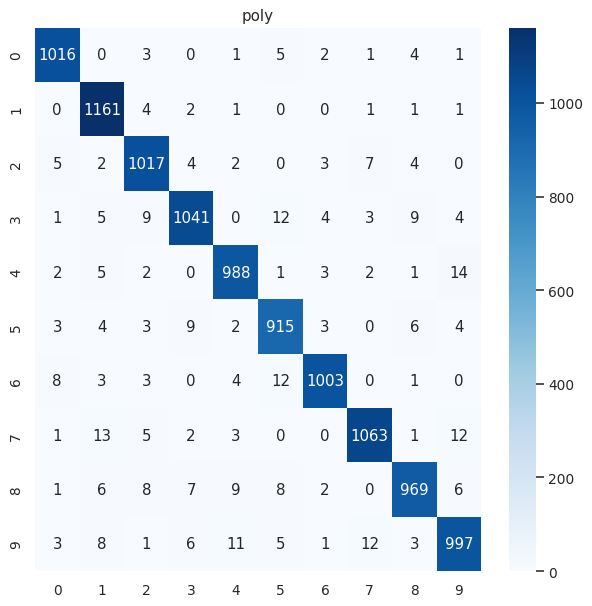

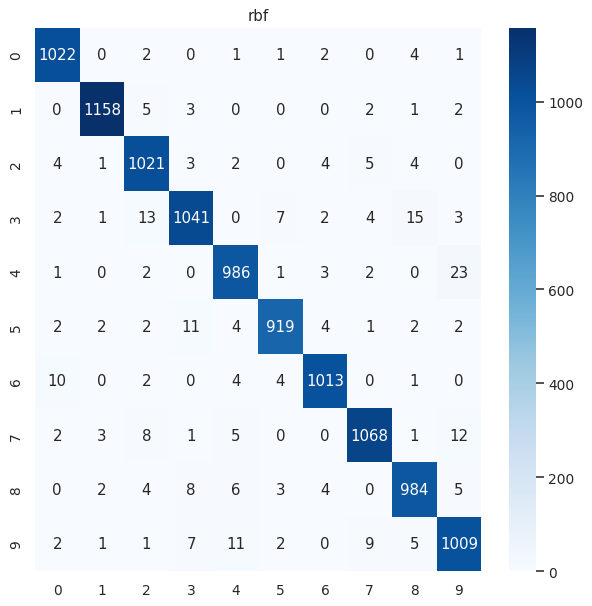

In [22]:
list_model=["linear","poly","rbf"]
for each in range(len(matrices_confusion)):
    plt.figure(figsize=(8,8),dpi=90)
    plt.title(list_model[each])
    sns.set(font_scale=1)
    sns.heatmap(matrices_confusion[each], annot=True,fmt='g', cmap='Blues')

Ces matrices nous permettent de voir les faux négatifs et les faux positifs. L'acceptabilité des montants dépendra du domaine d'activité / des exigences de notre entreprise (Par exemple dans le domaine du médical, les faux négatifs devront être le plus proche de 0).

GRIDSEARCHCV 

In [15]:
from sklearn.model_selection import GridSearchCV

parameters={"C":[i for i in range(1,10)],"gamma":["scale","auto"]}
best_model=GridSearchCV(my_svc[2],parameters,scoring="accuracy",n_jobs=-1)
best_model.fit(X_train,y_train)
best_model.best_params_
# {'C': 8, 'gamma': 'scale'}

{'C': 8, 'gamma': 'scale'}

Afin d'optimiser le modèle, nous allons jouer sur C et sur gamma.

In [18]:
grid_predictions = best_model.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1022    0    3    0    1    2    2    0    2    1]
 [   0 1160    4    2    0    0    0    2    2    1]
 [   5    0 1028    3    1    0    2    3    2    0]
 [   1    2    9 1058    0    6    1    1    6    4]
 [   0    0    2    0  997    2    4    2    0   11]
 [   2    1    2   10    4  919    4    1    2    4]
 [   8    1    2    0    1    3 1018    0    1    0]
 [   2    2    8    1    3    1    0 1077    0    6]
 [   0    1    5    5    2    2    3    1  993    4]
 [   2    1    2    5    9    2    0    5    4 1017]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1033
           1       0.99      0.99      0.99      1171
           2       0.97      0.98      0.97      1044
           3       0.98      0.97      0.97      1088
           4       0.98      0.98      0.98      1018
           5       0.98      0.97      0.97       949
           6       0.98      0.98      0.98      1034
           7       0.99      0.98   

Grâce à GridsearchCV nous avons pu améliorer l'accuracy, passant de 0.97 à 0.98 pour le modèle RBF.

VISUALISATION MATRICE DE CONFUSION

<AxesSubplot:>

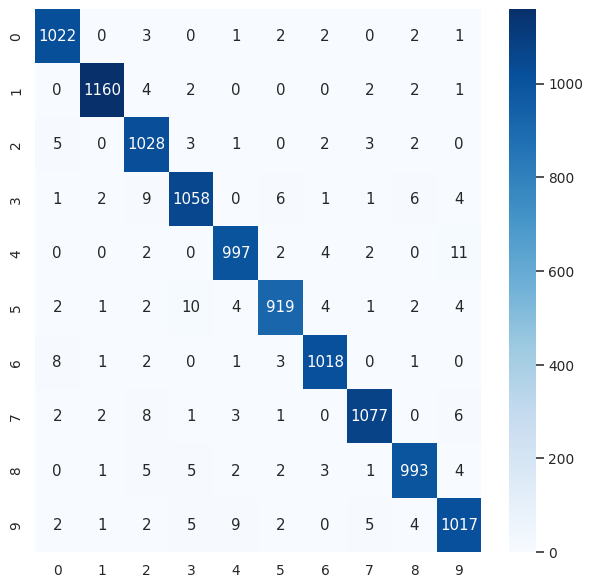

In [20]:
plt.figure(figsize=(8,8),dpi=90)
sns.set(font_scale=1)
sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True,fmt='g', cmap='Blues')

In [7]:
# clf=SVC(C=8)
# clf.fit(X_train,y_train)

SVC(C=8)

In [8]:
# X_kaggle=pd.read_csv("test.csv")

In [9]:
# ypred_test=clf.predict(X_kaggle)

In [14]:
# df_sample_submission=pd.DataFrame({"ImageId":[i for i in range(1,len(ypred_test)+1)],"Label":[int(x) for x in ypred_test]})


# df_sample_submission.to_csv('submission_final.csv', index=False)